In [2]:
import pandas as pd
import ast

### Merge the csv files

In [3]:
data_mahmoud = pd.read_csv('./labeled_data_Mahmoud.csv')
data_josh = pd.read_csv('./labeled_data_Josh_edited_byZhan.csv')
data_zhan = pd.read_csv('./labeled_data_Zhan.csv')
data_awen = pd.read_csv('./labeled_data_Awen.csv')
data = pd.concat([data_mahmoud, data_josh, data_zhan, data_awen], ignore_index=True)
data.head()

,file_name,character,order,top_left,bottom_right
0,CMC_CCM_2018_01_30_23_14_21_55860660845.png,5,1,"(855.0, 787.0)","(906.0, 820.0)"
1,CMC_CCM_2018_01_30_23_14_21_55860660845.png,5,2,"(855.0, 755.0)","(906.0, 786.0)"
2,CMC_CCM_2018_01_30_23_14_21_55860660845.png,8,3,"(851.0, 720.0)","(907.0, 750.0)"
3,CMC_CCM_2018_01_30_23_14_21_55860660845.png,6,4,"(847.0, 684.0)","(904.0, 717.0)"
4,CMC_CCM_2018_01_30_23_14_21_55860660845.png,0,5,"(845.0, 660.0)","(903.0, 685.0)"


### Number of unique images

In [4]:
data["file_name"].nunique()

90

### Characters

In [5]:
# number unique characters
data["character"].nunique()

13

In [6]:
# List of different characters found
data["character"].unique()

array(['5', '8', '6', '0', '4', '3', '9', '7', '1', 'C', 'X', '2', 'E'],
      dtype=object)

The characters used are the 10 numbers and 3 letters "C", "X" and "E"

### Charcaters distribution

<AxesSubplot: >

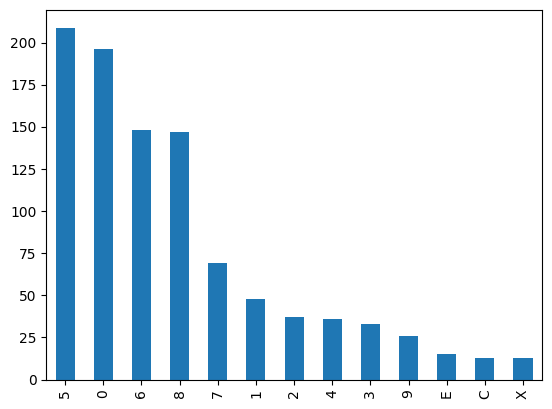

In [7]:
data['character'].value_counts().plot(kind='bar')

### Bounding boxes

In [8]:
# Convert string representations of tuples to actual tuples
data['top_left'] = data['top_left'].apply(ast.literal_eval)
data['bottom_right'] = data['bottom_right'].apply(ast.literal_eval)

# Calculate width, height, and area of bounding boxes
data['width'] = data['bottom_right'].apply(lambda br: br[0]) - data['top_left'].apply(lambda tl: tl[0])
data['height'] = data['bottom_right'].apply(lambda br: br[1]) - data['top_left'].apply(lambda tl: tl[1])
data['area'] = data['width'] * data['height']

In [9]:
# Average bounding box size
average_width = data['width'].mean()
average_height = data['height'].mean()
average_area = data['area'].mean()

In [10]:
print("\nAverage bounding box width:", average_width)
print("Average bounding box height:", average_height)
print("Average bounding box area:", average_area)


Average bounding box width: 64.18282828282828
Average bounding box height: 39.21313131313131
Average bounding box area: 2626.691919191919
